# Data preparation

In [18]:
import os
import pandas as pd
import numpy as np

df_path = 'C:\imbalance_forecast\data\df_nord.csv'
df_nord = pd.read_csv(df_path, index_col=0, parse_dates=True)

# Check for duplicate timestamps in the index
duplicates = df_nord.index.duplicated(keep=False)  # True for duplicates
duplicate_timestamps = df_nord[duplicates]

# Remove duplicates by keeping the first occurrence
df_nord = df_nord[~df_nord.index.duplicated(keep='first')]

df_nord

<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_5512\1878315696.py:5: SyntaxWarning: invalid escape sequence '\i'
  df_path = 'C:\imbalance_forecast\data\df_nord.csv'


,SBIL_MWH,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,AUSTRIA_MWQH,FRANCE_MWQH,SLOVENIA_MWQH,SWITZERLAND_MWQH,SCHEDULED_INTERNAL_EXCHANGE_MW,MGP_NORD_PURCHASES,MGP_NORD_SALES,MI1_NORD_PURCHASES,MI1_NORD_SALES,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-47.312,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11776.405,12085.191
2019-01-01 00:15:00,-30.343,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11723.369,12010.132
2019-01-01 00:30:00,-20.311,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11771.133,11984.692
2019-01-01 00:45:00,-13.934,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11740.606,11935.066
2019-01-01 01:00:00,-65.080,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.5,292.0,235.1475,2741.11600,2086.04475,224.06475,297.123,11559.374,11825.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN
2024-10-31 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN
2024-10-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN


<h3> Normalize the data </h3>

Data transformation is the most important step in a machine learning pipeline which includes modifying the raw data and converting it into a better format so that it can be more suitable for analysis and model training purposes. In data transformation, we usually deal with issues such as noise, missing values, outliers, and non-normality.

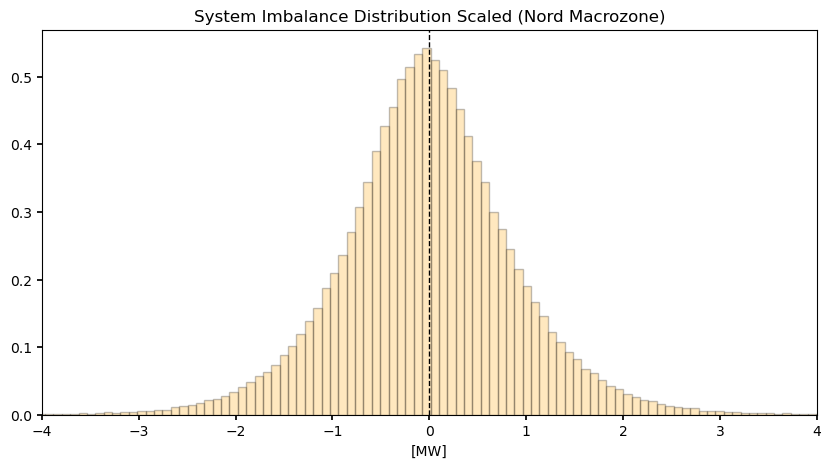

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_nord is already defined and contains the 'SBIL_MWH' column
y = df_nord['SBIL_MWH']
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Parameters
n_bins = 300  
DPI = 100  

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=DPI)

# Plot Histogram
ax.hist(y_scaled, bins=n_bins, alpha=0.25,
         density=True, color='orange', edgecolor='black')

# Set title and labels
ax.set_title("System Imbalance Distribution Scaled (Nord Macrozone)")
ax.set_xlabel("[MW]")

# Set x-limits for better visibility
ax.set_xlim(-4, 4)  # Adjust this as needed for better visualization

# Customize ticks
ax.tick_params(width=1.25)

# Add a vertical line at x=0
ax.axvline(0, color='black', ls='--', linewidth=1, alpha=1)

# Show the plot
plt.show()

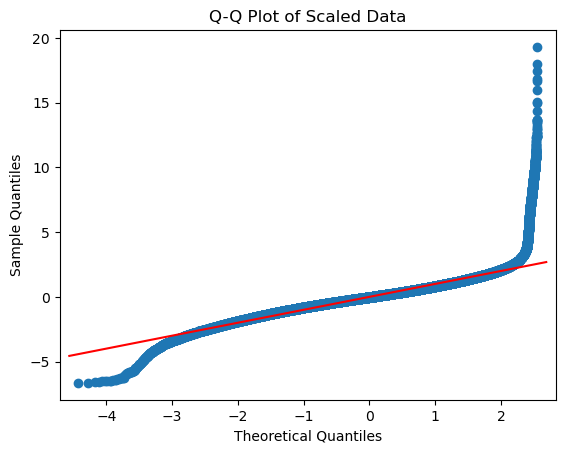

Shapiro-Wilk Test Statistic: nan
Shapiro-Wilk p-value: nan
Fail to reject the null hypothesis: the data is normally distributed.


In [ ]:
import statsmodels.api as sm
from scipy import stats
import pylab as py

# Q-Q Plot
fig = sm.qqplot(y_scaled, line='s')
py.title('Q-Q Plot of Scaled Target Data')
py.xlabel('Theoretical Quantiles')
py.ylabel('Sample Quantiles')


# Add bisector line (y = x)
xmin, xmax = py.xlim()
py.plot([xmin, xmax], [xmin, xmax], color='red')

py.show()

# Normality Test - Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(y_scaled)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}')
print(f'Shapiro-Wilk p-value: {shapiro_p:.4f}')

if shapiro_p < 0.05:
    print("Reject the null hypothesis: the data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: the data is normally distributed.")